In [62]:
import matplotlib.pylab as plt
import matplotlib as m

%matplotlib inline

import pandas as pd
import numpy as np
import pickle as pickle

In [3]:
df_all = pickle.load(open('pickles/June_labeled_updated_fpl.p', 'rb'))

In [6]:
def setup(df):
    p = 0.75
    of_interest = df.predict_fpa > p

    df["first_person_alcohol"] = 0
    df["first_person_alcohol"][of_interest] = 1
    fp_cols = [ 'predict_present', 'predict_future', 'predict_past']
    new_fp_cols = ["casual", "looking", "reflecting"]
    for new_name, old_name in zip(new_fp_cols, fp_cols):
        df[new_name] = df[old_name] >0.6

In [7]:
setup(df_all)

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
week1 = df_all['2015-06-01':'2015-06-07']
week2 = df_all['2015-06-08':'2015-06-14']
week3 = df_all['2015-06-15':'2015-06-21']
week4 = df_all['2015-06-22':'2015-06-28']
week5 = df_all['2015-06-29':]
weeks = [week1, week2, week4]

In [86]:
temp = pd.DataFrame()
fpl = [df_all.casual, df_all.looking, df_all.reflecting]
by_hour = list()
for df in fpl:
    temp = df.groupby([df.index.dayofweek, df.index.hour]).agg(
        'mean'
    )
    by_hour.append(temp)

In [81]:
def cross_corr(ts1, ts2, lag=0):
    return ts1.corr(ts2.shift(lag))

In [87]:
by_hour[0].shape

(168,)

In [88]:
correlogram = [cross_corr(by_hour[0], by_hour[2], lag = i) for i in range(28)]

In [89]:
correlogram

[0.0033272979431857369,
 -0.00030799628860753213,
 0.0045487444935501577,
 0.013908704051362589,
 0.062354758147228781,
 0.11513747282593749,
 0.18735753901246258,
 0.23442860180845981,
 0.28164930380368897,
 0.38115088823079551,
 0.44636813037245981,
 0.52495690937754558,
 0.59851467897017341,
 0.67654546772965329,
 0.68747454998901691,
 0.67125142098435076,
 0.59726503643854267,
 0.49920190593989222,
 0.35670098302778275,
 0.23675955357669834,
 0.12141835317526314,
 0.015324150111422232,
 -0.070147256142134004,
 -0.12450179879798315,
 -0.16775430267852817,
 -0.2184951014349665,
 -0.24698590239740983,
 -0.25048511752817332]

In [98]:
def plot_correlogram(ts1, ts2, max_lag):
    def cross_corr(ts1, ts2, lag=0): return ts1.corr(ts2.shift(lag))
    correlogram = [cross_corr(ts1, ts2, lag = i) for i in range(max_lag)]
    plt.plot(range(max_lag), correlogram)
    plt.xticks(range(0, 24*7, 24))
    plt.grid()

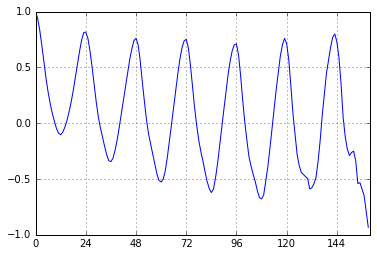

In [101]:
plot_correlogram(by_hour[0], by_hour[0], 160)

In [73]:
from scipy import signal